<a href="https://colab.research.google.com/github/FGalvao77/Introducao-ao-Processamento-de-Linguagem-Natural-NLP-/blob/main/Introdu%C3%A7%C3%A3o_ao_Processamento_de_Linguagem_Natural_(PLN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introdução ao Processamento de Linguagem Natural (NLP)**
---

**Introdução**

O desafio dessa atividade é construir um modelo que seja capaz de, digitada uma palavra prever a próxima. Para isso, utilizaremos algumas técnicas de _[Processamento de linguagem natural](https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural)_.

Iremos aplicar uma arquitetura de [Rede Neural Artificial](https://pt.wikipedia.org/wiki/Rede_neural_artificial) e construir três modelos, sendo que:
- um modelo base, um pouco mais simples;
- o segundo, com uma arquitetura intermediária, um pouco mais complexa que o primeiro modelo e,
- por último, um modelo com arquitetura com mais camadas e, consequetemente aumentando sua compexidade.

A base de aprendizagem do modelo será a utilização de livros ([e-Books](https://pt.wikipedia.org/wiki/Livro_digital)), que podemos encontrar no site [Project Gutenberg](https://www.gutenberg.org/).





**Introduction**

The challenge of this activity is to build a model that, after typing a word, is able to predict the next one. For this, we will use some [Natural Language Processing](https://en.wikipedia.org/wiki/Natural_language_processing) techniques.

We will apply an [Artificial Neural Network](https://en.wikipedia.org/wiki/Artificial_neural_network) architecture and build three models, as follows:

- a base model, a little simpler;
- the second, with an intermediate architecture, a little more complex than the first model and,
- finally, a model with architecture with more layers and, consequently, increasing its complexity.

The learning base of the model will be the use of books ([e-Books](https://en.wikipedia.org/wiki/Ebook)), which we cannot find on the [Project Gutenberg](https://www.gutenberg.org/) website.

**e-Books of interest:**

**1)** `The Merchant of Venice`, by _William Shakespeare._<br>
**2)** `Utopia`, by _Saint Thomas More._<br>
**3)** `Beyond Good and Evil`, by _Friedrich Wilhelm Nietzsche._<br>
**4)** `Lord of the World`, by _Robert Hugh Benson_.<br>
**5)** `The War of the Worlds`, by _H. G. Wells._<br>
**6)** `Crime and Punishment`, by _Fyodor Dostoevsky._<br>
**7)** `Les Misérables`, by _Victor Hugo._<br>

In [ ]:
# importando funções para visualizar a versão do python e sistema operacional
from platform import python_version, system, release
print(f'Versão Python: {python_version()} \nSO: {system()} | {release()}')

Versão Python: 3.7.12 
SO: Linux | 5.4.144+


In [ ]:
# importando biblioteca para ignorar mensagens de alertas
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importando função para realizar a leitura/carregamento da url
from urllib.request import urlopen

In [ ]:
# instanciando as url's dos e-Books
url_1 = 'https://www.gutenberg.org/files/1515/1515-0.txt'           # The Merchant of Venice, by William Shakespeare
url_2 = 'https://www.gutenberg.org/files/2130/2130-0.txt'           # Utopia, by Saint Thomas More
url_3 = 'https://www.gutenberg.org/cache/epub/4363/pg4363.txt'      # Beyond Good and Evil, by Friedrich Wilhelm Nietzsche
# url_4 = 'https://www.gutenberg.org/cache/epub/14021/pg14021.txt'    # Lord of the World, by Robert Hugh Benson.
# url_5 = 'https://www.gutenberg.org/files/36/36-0.txt'               # The War of the Worlds, by H. G. Wells
# url_6 = 'https://www.gutenberg.org/files/2554/2554-0.txt'           # Crime and Punishment, by Fyodor Dostoevsky
# url_7 = 'https://www.gutenberg.org/files/135/135-0.txt'             # Les Misérables, by Victor Hugo

> ⚠ Devido a capacidade computacionais, irei utilizar como base da dados somente três livros.

<font size=4>**Carregamento dos dados**</font>

In [ ]:
# realizando a leitura/carregamento dos textos (eBooks) e, instanciando-os em cada objeto próprio
data_1 = urlopen(url_1)
text_1 = (data_1.read()).decode('utf-8')

data_2 = urlopen(url_2)
text_2 = (data_2.read()).decode('utf-8')

data_3 = urlopen(url_3)
text_3 = (data_3.read()).decode('utf-8')

# data_4 = urlopen(url_4)
# text_4 = (data_4.read()).decode('utf-8')

# data_5 = urlopen(url_5)
# text_5 = (data_5.read()).decode('utf-8')

# data_6 = urlopen(url_6)
# text_6 = (data_6.read()).decode('utf-8')

# concatenando os objetos e um novo objeto chamado "concatenatde_texts"
concatenated_texts = text_1 + text_2 + text_3 #+ text_4 + text_5, text_6, text_7

# deletando para evitar carregamento desnecessários 
del text_1, text_2, text_3, #text_4, text_5, text_6, text_7

# contabilizando a quantidade de instãncias presentes no objeto
len(concatenated_texts)

814659

In [ ]:
# imprimindo o conteúdo do objeto
print(concatenated_texts)

﻿The Project Gutenberg eBook of The Merchant of Venice, by William Shakespeare

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: The Merchant of Venice

Author: William Shakespeare

Release Date: November, 1998 [eBook #1515]
[Most recently updated: November 13, 2021]

Language: English

Character set encoding: UTF-8

Produced by: the PG Shakespeare Team, a team of about twenty Project Gutenberg volunteers.

*** START OF THE PROJECT GUTENBERG EBOOK THE MERCHANT OF VENICE ***

cover




THE MERCHANT OF VENICE


by William Shakespeare


Contents

ACT I
Scene I. Venice. A street.
Scene II. Belmo

<font size=4>**Limpeza e preparação dos dados**</font>

In [ ]:
# importando as bibliotecas e funções necessárias
import numpy as np
import re
import nltk

from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer

In [ ]:
# realizando o download do pacote "punkt" (tokenizador de frases)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# realizando um tratamento/limpeza do objeto "concatenated_texts"

cleaned = re.sub(r'\W+', ' ', concatenated_texts).lower()   # transformando as palavras em caixa baixa
tokens = word_tokenize(cleaned)     # aplicando o "word_tokenize" para remoção de pontuações e salvando o resultado np obejto "tokens"

train_len = 3 + 1
text_sequences = []

for i in range(train_len, len(tokens)):
    seq = tokens[i - train_len:i]
    text_sequences.append(seq)

# definindo um dicionário para salvar o resultado    
sequences = {}
count = 1

# realizando um laço de repetição e salvando o resultado no dicionário "sequences"
for i in range(len(tokens)):
    if tokens[i] not in sequences:
        sequences[tokens[i]] = count
        count += 1

# instanciando o tekenizador       
tokenizer = Tokenizer()
# aplicando o tokenizador
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)

# coletando algumas informações
vocabulary_size = len(tokenizer.word_counts) + 1

# realizando a transformação da matriz para do tipo "int32"
n_sequences = np.empty([len(sequences), train_len], dtype='int32')

# realizando um laço de repetição no objeto "sequences"
for i in range(len(sequences)):
    n_sequences[i] = sequences[i]

In [ ]:
# 3 exemplos aleatórios de sequência de palavras
n = 3 

for seq in range(n):
    k = np.random.choice(range(len(n_sequences)))

    for i in sequences[k]:
        print(tokens[i])
    print('\n')

person
your
god
your


recently
house
it
give


ebook
house
scene
shakespeare




In [ ]:
# visualizando a quantidade de itens presentes no objeto
vocabulary_size

11638

In [ ]:
# contabilizando a quantidade de observações no objeto "n_sequences"
len(n_sequences)

141042

In [ ]:
# importando a biblioteca do tensorflow
import tensorflow as tf

# importando a função "to_categorical" da biblioteca do tensorflow/keras
# from tensorflow.keras.utils import to_categorical   # converte um vetor de classe (inteiros) em uma matriz de classe binária

In [ ]:
# definindo o intervalo de entrada e saída dos dados de treino
train_inputs = n_sequences[:, :-1]
train_targets = n_sequences[:, -1]

# realizando a tranformação do vetor "train_targets" com o número de classes presentes no objeto "vocabulary_size"
train_targets = tf.keras.utils.to_categorical(train_targets, num_classes = vocabulary_size)

# instanciando a quantidade de observações no objeto "train_inputs"
seq_len = train_inputs.shape[1]

# imprimindo o resultado em cada objeto
print(train_inputs.shape)
print(train_targets[0])

(141042, 3)
[0. 0. 0. ... 0. 0. 0.]


<font size=4>**Modelo _baseline_**</font>

- modelo básico com uma camada _oculta_ e com apenas 50 neurônios.

In [ ]:
# importando as funções necessárias para construção da rede neural artificial
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

In [ ]:
# instanciando uma RNA "baseline"
baseline_model = Sequential()

# definindo a camada de entrada, escondida e a saída, e as funções de ativação
baseline_model.add(Embedding(vocabulary_size, seq_len, input_length=seq_len))

baseline_model.add(LSTM(50, return_sequences=True))
baseline_model.add(LSTM(50))

baseline_model.add(Dense(50, activation='relu'))
baseline_model.add(Dense(vocabulary_size, activation='softmax'))

In [ ]:
# visualizando o sumário do modelo
baseline_model.summary()    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 3)              34914     
                                                                 
 lstm (LSTM)                 (None, 3, 50)             10800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 11638)             593538    
                                                                 
Total params: 662,002
Trainable params: 662,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compilando e definindo a função para perda e do otimizador e, a métrica a ser utilizada no modelo
baseline_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# importando as funções de parada e redução da taxa de aprendizagem
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
# definindo os "callbacks"

# instanciando a função de parada do modelo
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    min_delta=0.1e-3,   # 0.1e-3 == 0.0001
    mode='auto'
)

# instanciando a redução da taxa de aprendizagem do modelo
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.1e-4,      # 0.1e-4 == 0.00001
    verbose=1
)

# criando um objeto com a função importada e definindo o ponto de checagem com o objeto "checkpoint_path"
checkpoint = ModelCheckpoint(
    monitor='val_accuracy',
    filepath='ann_PredictWord.h5',
    save_freq='epoch',
    save_weights_only=True,
    save_best_only=True,
    verbose=1,
    mode='auto'
)

<font size=3>**Treinando o modelo**</font>

In [ ]:
# realizando o treinamento do modelo e salvando o resultado no objeto "baseline_history"
baseline_history = baseline_model.fit(
    train_inputs, 
    train_targets, 
    epochs=50,
    validation_split=0.2,
    verbose=1,
    callbacks=[custom_early_stopping, reduce_lr, checkpoint]
)

Epoch 1/50
3525/3527 [============================>.] - ETA: 0s - loss: 6.8397 - accuracy: 0.0500
Epoch 1: val_accuracy improved from -inf to 0.05587, saving model to ann_PredictWord.h5
3527/3527 [==============================] - 88s 23ms/step - loss: 6.8397 - accuracy: 0.0500 - val_loss: 6.9665 - val_accuracy: 0.0559 - lr: 0.0010
Epoch 2/50
3526/3527 [============================>.] - ETA: 0s - loss: 6.4778 - accuracy: 0.0662
Epoch 2: val_accuracy improved from 0.05587 to 0.07891, saving model to ann_PredictWord.h5
3527/3527 [==============================] - 79s 22ms/step - loss: 6.4778 - accuracy: 0.0662 - val_loss: 7.0120 - val_accuracy: 0.0789 - lr: 0.0010
Epoch 3/50
3525/3527 [============================>.] - ETA: 0s - loss: 6.2665 - accuracy: 0.0778
Epoch 3: val_accuracy improved from 0.07891 to 0.08816, saving model to ann_PredictWord.h5
3527/3527 [==============================] - 79s 22ms/step - loss: 6.2665 - accuracy: 0.0778 - val_loss: 6.9470 - val_accuracy: 0.0882 - lr:

In [ ]:
# visualizando os items presentes no objeto "history"
baseline_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [ ]:
# metrics_model = list(baseline_history.history.keys())
# metrics_model

<font size=3>**Visualizando as métricas do modelo**</font>

In [ ]:
# importando bibliotecas para visualização gráfica 
import matplotlib.pyplot as plt
import seaborn as sns

# configurando a exibição 
%matplotlib inline
sns.set()

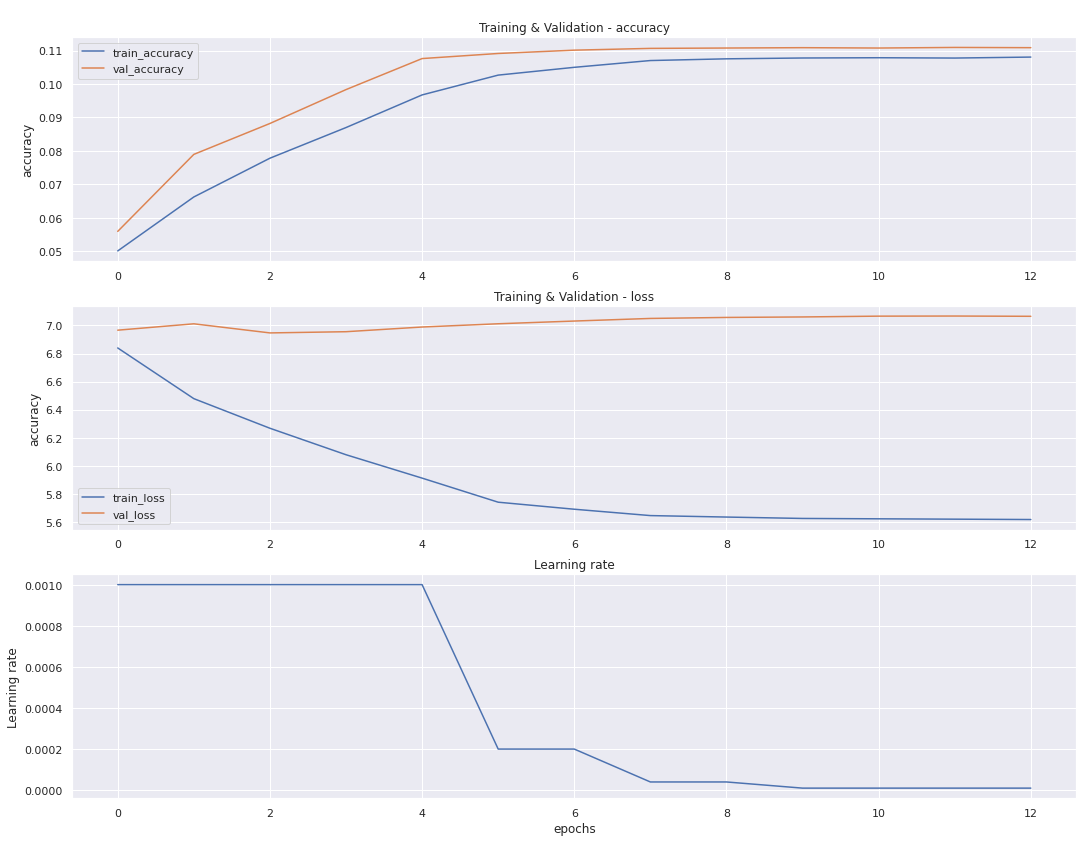

In [ ]:
# função para plotagem de gráficos
def plot_performace(history, metric1='accuracy', metric2='loss', metric3='lr'):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18,14))

    ax1.plot(baseline_history.history[metric1])
    ax1.plot(baseline_history.history['val_' + metric1])
    ax1.set_title('\nTraining & Validation - ' + metric1)
    ax1.set_ylabel('accuracy')
    # ax1.set_xlabel('epochs')
    ax1.legend(['train_' + metric1, 
                'val_' + metric1])
    
    ax2.plot(baseline_history.history[metric2])
    ax2.plot(baseline_history.history['val_' + metric2])
    ax2.set_title('\nTraining & Validation - ' + metric2)
    ax2.set_ylabel('accuracy')
    # ax2.set_xlabel('epochs')
    ax2.legend(['train_' + metric2, 
                'val_' + metric2])
  
    ax3.plot(baseline_history.history[metric3])
    ax3.set_title('\nLearning rate')
    ax3.set_xlabel('epochs')
    ax3.set_ylabel('Learning rate')

# plotando os gráficos
plot_performace(baseline_history)

> Com os gráficos acima, podemos visualizar a _acurácia_ e as _taxa de perda_ e _aprendizagem do modelo_. Onde:
- em relação a acurácia, tanto treino e validação se manteve numa constante por volta da 10 época do treinamento e, seus resultados ficaram muito próximos.
- já para a taxa de perda, tivemos resultados bem distintos e em destaque para taxa de validação que foi maior. E também a partir de um certo momento (época), elas se mantiveram em uma constante.
- e por fim, a taxa de aprendizagem teve uma queda considerável ficando bem baixa.


Vamos dar continuidade!

<font size=3>**Salvando o modelo**</font>

In [ ]:
# salvando o modelo
baseline_model.save('baseline_model_PredictWord.h5')
# baseline_model.save('baseline_model_PredictWord.h5')

In [ ]:
# importando função para realizar a leitura do objeto
from keras.models import load_model

In [ ]:
# realizando a leitura do objeto e salvando no objeto "model_"
model_ = load_model('baseline_model_PredictWord.h5')
# model_ = load_model('/content/ann_PredictWord.h5')
model_  # visualizando endereço de memório do objeto

<font size=3>**Testando o modelo**</font>

In [ ]:
# importando função para visualizar sequências de "pads" com o mesmo comprimento
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# entrada da palavra/frase
input_text = input().strip().lower()

# realizando a tokenização da entrada e a salvando a sequência das palavras encontradas
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

# visualizando o resultado
print('\nNext word suggestions:')
for i in (baseline_model.predict(pad_encoded)[0]).argsort()[-10:][::-1]:
    pred_word = tokenizer.index_word[i]
    
    print(f'"{pred_word}"')
#     print(f'Next word suggestion: {pred_word}')

he was

Next word suggestions:
"a"
"the"
"not"
"to"
"much"
"so"
"as"
"be"
"been"
"in"


<font size=4>**Segundo modelo**</font>

- modelo intermediário com uma camada _oculta_ e com 500 neurônios.

In [ ]:
# instanciando a RNA "intermediate_model"
intermediate_model = Sequential()

# definindo a camada de entrada, escondida e a saída, e as funções de ativação
intermediate_model.add(Embedding(vocabulary_size, seq_len, input_length=seq_len))

intermediate_model.add(LSTM(500, return_sequences=True))
intermediate_model.add(LSTM(500))

intermediate_model.add(Dense(500, activation='relu'))
intermediate_model.add(Dense(vocabulary_size, activation='softmax'))

# visualizando o sumário do modelo
intermediate_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 3)              34914     
                                                                 
 lstm_2 (LSTM)               (None, 3, 500)            1008000   
                                                                 
 lstm_3 (LSTM)               (None, 500)               2002000   
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 11638)             5830638   
                                                                 
Total params: 9,126,052
Trainable params: 9,126,052
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compilando e definindo a função para perda e do otimizador e, a métrica a ser utilizada no modelo
intermediate_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<font size=3>**Treinando o segundo modelo**</font>

In [ ]:
# realizando o treinamento do modelo e salvando o resultado no objeto "intermediate_model"
intermediate_history = intermediate_model.fit(
    train_inputs, 
    train_targets, 
    epochs=80,
    validation_split=0.5,   # alterado a divisão da validação de 0.2  para 0.5
    verbose=1, 
    callbacks=[custom_early_stopping, reduce_lr, checkpoint]
)

Epoch 1/80
2204/2204 [==============================] - ETA: 0s - loss: 6.6046 - accuracy: 0.0474
Epoch 1: val_accuracy did not improve from 0.11092
2204/2204 [==============================] - 461s 207ms/step - loss: 6.6046 - accuracy: 0.0474 - val_loss: 7.1126 - val_accuracy: 0.0787 - lr: 0.0010
Epoch 2/80
2204/2204 [==============================] - ETA: 0s - loss: 6.1829 - accuracy: 0.0664
Epoch 2: val_accuracy did not improve from 0.11092
2204/2204 [==============================] - 459s 208ms/step - loss: 6.1829 - accuracy: 0.0664 - val_loss: 7.2534 - val_accuracy: 0.0868 - lr: 0.0010
Epoch 3/80
2204/2204 [==============================] - ETA: 0s - loss: 5.9167 - accuracy: 0.0779
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 3: val_accuracy did not improve from 0.11092
2204/2204 [==============================] - 466s 212ms/step - loss: 5.9167 - accuracy: 0.0779 - val_loss: 7.3715 - val_accuracy: 0.0957 - lr: 0.0010
Epoch 4/80
2204/2204 [===

<font size=3>**Visualizando as métricas do segundo modelo**</font>

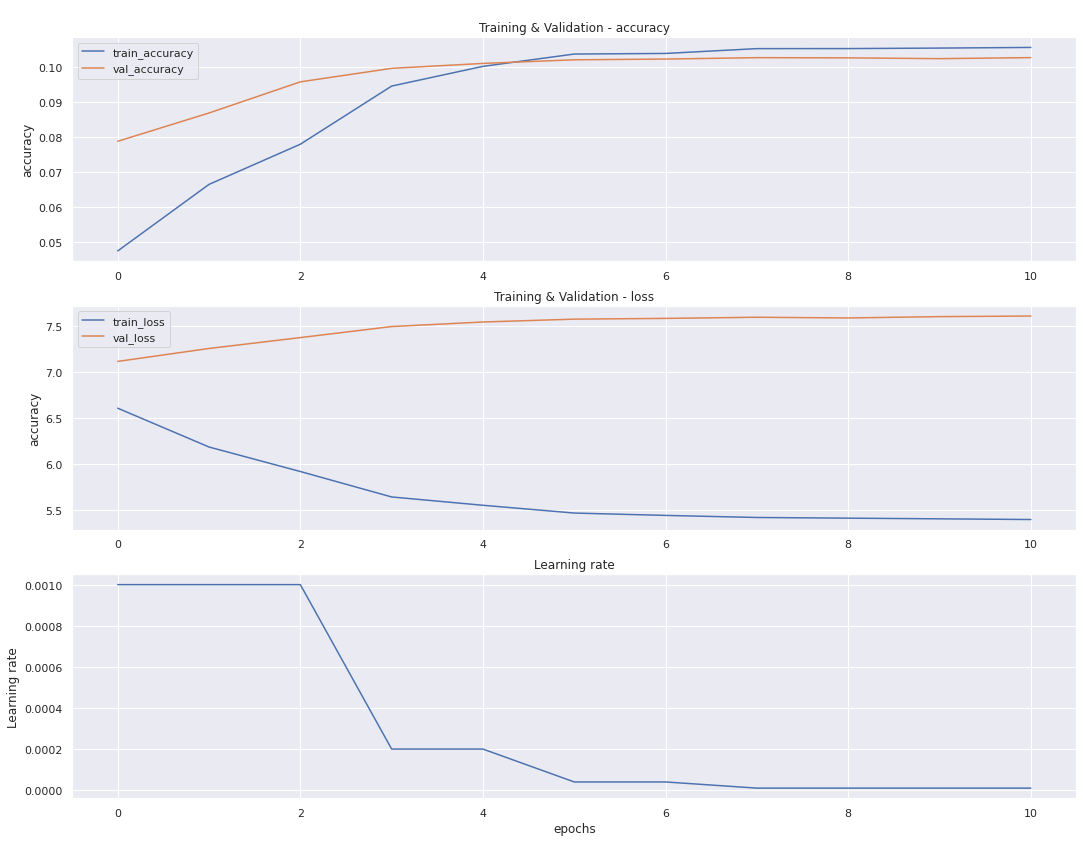

In [ ]:
# função para plotagem de gráficos
def plot_performace(history, metric1='accuracy', metric2='loss', metric3='lr'):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18,14))

    ax1.plot(intermediate_history.history[metric1])
    ax1.plot(intermediate_history.history['val_' + metric1])
    ax1.set_title('\nTraining & Validation - ' + metric1)
    ax1.set_ylabel('accuracy')
    # ax1.set_xlabel('epochs')
    ax1.legend(['train_' + metric1, 
                'val_' + metric1])
    
    ax2.plot(intermediate_history.history[metric2])
    ax2.plot(intermediate_history.history['val_' + metric2])
    ax2.set_title('\nTraining & Validation - ' + metric2)
    ax2.set_ylabel('accuracy')
    # ax2.set_xlabel('epochs')
    ax2.legend(['train_' + metric2, 
                'val_' + metric2])
  
    ax3.plot(intermediate_history.history[metric3])
    ax3.set_title('\nLearning rate')
    ax3.set_xlabel('epochs')
    ax3.set_ylabel('Learning rate')

# plotando os gráficos
plot_performace(intermediate_history)

<font size=3>**Salvando o segundo modelo**</font>

In [ ]:
# salvando o modelo
intermediate_model.save('intermediate_model_PredictWord.h5')

In [ ]:
# realizando a leitura do objeto e salvando no objeto "model_2"
model_2 = load_model('intermediate_model_PredictWord.h5')
model_2  # visualizando endereço de memório do objeto

<font size=3>**Testando o segundo modelo**</font>

In [ ]:
# entrada da palavra/frase para consulta 
input_text = input().strip().lower()

# realizando a tokenização da entrada e a salvando a sequência das palavras encontradas
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

# visualizando o resultado
print('\nNext word suggestions:')
for i in (intermediate_model.predict(pad_encoded)[0]).argsort()[-10:][::-1]:
    pred_word = tokenizer.index_word[i]
    
    print(f'"{pred_word}"')
#     print(f'Next word suggestion: {pred_word}')

he was

Next word suggestions:
"a"
"the"
"to"
"not"
"no"
"in"
"as"
"so"
"much"
"that"


<font size=4>**Terceiro modelo**</font>

- modelo com _camadas ocultas_ de 500 neurônios em cada, usaremos também a função `Dropout`.

In [ ]:
# importando a função "Dropout"
from keras.layers import Dropout

In [ ]:
# instanciando o modelo
complex_model = tf.keras.models.Sequential()

# definindo as camadas: entrada, oculta e de saída e, as funções de ativação
complex_model.add(Embedding(vocabulary_size, seq_len, input_length=seq_len))

complex_model.add(LSTM(units=1_000,return_sequences=True, activation='relu', ))
complex_model.add(Dropout(0.2))

complex_model.add(LSTM(units=1_000, activation='relu'))
complex_model.add(Dense(units=1_000, activation='relu'))
complex_model.add(Dropout(0.2))

complex_model.add(Dense(units=1_000, activation='relu'))
complex_model.add(Dropout(0.2))

complex_model.add(Dense(vocabulary_size, activation='softmax'))

# visualizando o sumário do modelo
complex_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 3, 3)              34914     
                                                                 
 lstm_4 (LSTM)               (None, 3, 1000)           4016000   
                                                                 
 dropout (Dropout)           (None, 3, 1000)           0         
                                                                 
 lstm_5 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 1000)             

In [ ]:
# compilando e definindo a função para perda e do otimizador e, a métrica a ser utilizada no modelo
complex_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# realizando o treinamento do modelo e salvando o resultado no objeto "complex_history"
complex_history = complex_model.fit(
    train_inputs, 
    train_targets, 
    epochs=80,
    validation_split=0.5,
    verbose=1, 
    callbacks=[custom_early_stopping, reduce_lr, checkpoint]
)

Epoch 1/80
2204/2204 [==============================] - ETA: 0s - loss: 6.6030 - accuracy: 0.0454
Epoch 1: val_accuracy improved from -inf to 0.06524, saving model to ann_PredictWord.h5
2204/2204 [==============================] - 1317s 596ms/step - loss: 6.6030 - accuracy: 0.0454 - val_loss: 7.1339 - val_accuracy: 0.0652 - lr: 0.0010
Epoch 2/80
2204/2204 [==============================] - ETA: 0s - loss: 6.2675 - accuracy: 0.0600
Epoch 2: val_accuracy improved from 0.06524 to 0.08040, saving model to ann_PredictWord.h5
2204/2204 [==============================] - 1284s 583ms/step - loss: 6.2675 - accuracy: 0.0600 - val_loss: 7.2605 - val_accuracy: 0.0804 - lr: 0.0010
Epoch 3/80
2204/2204 [==============================] - ETA: 0s - loss: 6.1182 - accuracy: 0.0670
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 3: val_accuracy improved from 0.08040 to 0.08551, saving model to ann_PredictWord.h5
2204/2204 [==============================] - 1286s 584ms

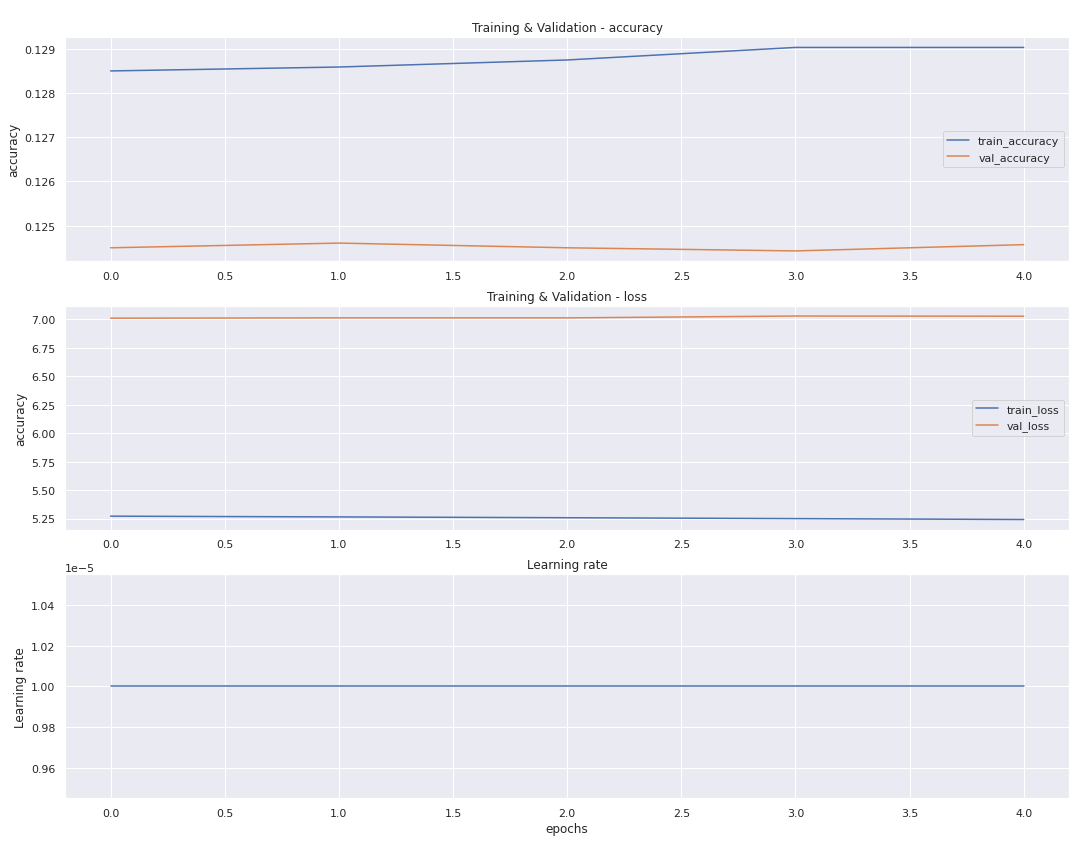

In [ ]:
# função para plotagem de gráficos
def plot_performace(history, metric1='accuracy', metric2='loss', metric3='lr'):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18,14))

    ax1.plot(complex_history.history[metric1])
    ax1.plot(complex_history.history['val_' + metric1])
    ax1.set_title('\nTraining & Validation - ' + metric1)
    ax1.set_ylabel('accuracy')
    # ax1.set_xlabel('epochs')
    ax1.legend(['train_' + metric1, 
                'val_' + metric1])
    
    ax2.plot(complex_history.history[metric2])
    ax2.plot(complex_history.history['val_' + metric2])
    ax2.set_title('\nTraining & Validation - ' + metric2)
    ax2.set_ylabel('accuracy')
    # ax2.set_xlabel('epochs')
    ax2.legend(['train_' + metric2, 
                'val_' + metric2])
  
    ax3.plot(complex_history.history[metric3])
    ax3.set_title('\nLearning rate')
    ax3.set_xlabel('epochs')
    ax3.set_ylabel('Learning rate')

# plotando os gráficos
plot_performace(complex_history)

<font size=3>**Salvando o terceiro modelo**</font>

In [ ]:
# salvando o modelo
complex_model.save('complex_model_PredictWord.h5')

In [ ]:
# realizando a leitura do objeto e salvando no objeto "model_3"
model_3 = load_model('complex_model_PredictWord.h5')
model_3  # visualizando endereço de memório do objeto

<font size=3>**Testando o terceiro modelo**</font>

In [ ]:
# entrada da palavra/frase para consulta 
input_text = input().strip().lower()

# realizando a tokenização da entrada e a salvando a sequência das palavras encontradas
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

# visualizando o resultado
print('\nNext word suggestions:')
for i in (complex_model.predict(pad_encoded)[0]).argsort()[-10:][::-1]:
    pred_word = tokenizer.index_word[i]
    
    print(f'"{pred_word}"')
#     print(f'Next word suggestion: {pred_word}')

<font size=3>**Bônus**</font>

In [ ]:
# importando função para salvar o modelo
import pickle as pkl

In [ ]:
# salvando o modelo final
final_model = tf.keras.models.load_model('ann_PredictWord.h5')

# realizando a leitura e carregando o modelo no objeto "tokenizer"
pkl.dump(tokenizer, open('tokenizer.pkl', 'wb'))
tokenizer = pkl.load(open('tokenizer.pkl', 'rb'))

In [ ]:
# importando biblioteca para criar uma caixa para digitação
from ipywidgets import widgets 

In [ ]:
# definindo uma função para sugestão da próxima palavra
def next_word_suggestion(text):
    input_text = text.strip().lower()
    encoded_text = tokenizer.texts_to_sequences([input_text])[0]
    pad_encoded = tf.keras.preprocessing.sequence.pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
  
    print('\nNext word suggestion:')
    for i in (final_model.predict(pad_encoded)[0]).argsort()[-1:][::-1]:
        pred_word = tokenizer.index_word[i]

#   print(f'"{pred_word}"')
    return pred_word


widgets.interact(next_word_suggestion, text=input('Type the word and/or phrase: '));

Type the word and/or phrase: i am a good man


interactive(children=(Text(value='i am a good man', description='text'), Output()), _dom_classes=('widget-inte…

<font size=3>**Outras informações**</font>

Instalando `session_info` para salvar as versões das bibliotecas/funções utilizadas no _notebook_.

In [ ]:
!pip install session_info

     |████████████████████████████████| 63 kB 1.4 MB/s 
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8048 sha256=34711b338056a02174987868de0a72609a3bf1c29551e800d7f81b9907dafcb9
  Stored in directory: /root/.cache/pip/wheels/bd/ad/14/6a42359351a18337a8683854cfbba99dd782271f2d1767f87f
Successfully built session-info


In [ ]:
# importando a biblioteca
import session_info

# visualizando as versões das bibliotecas e/ou funções utilizadas no notebook
session_info.show(html=False)

-----
ipywidgets          7.6.5
keras               2.8.0
keras_preprocessing 1.1.2
matplotlib          3.2.2
nltk                3.2.5
numpy               1.21.5
seaborn             0.11.2
session_info        1.0.0
tensorflow          2.8.0
-----
IPython             5.5.0
jupyter_client      5.3.5
jupyter_core        4.9.2
notebook            5.3.1
-----
Python 3.7.12 (default, Jan 15 2022, 18:48:18) [GCC 7.5.0]
Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic
-----
Session information updated at 2022-03-05 14:58
